In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

# Data load
data = pd.read_csv('../data/adult.csv')

# Data sanitisation
data = data.replace('?', 'NA')

data = data.replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
data = data.replace(['Wife', 'Husband'], 'Married')

data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
labels = data['income']
data = data.drop(columns='income')

data.loc[data['native.country'] != 'United-States', 'native.country'] = 'Outside-United-States' 
# print(data['native.country'].value_counts())

data = data.drop(columns = ['capital.gain', 'education']) #exista coloana education.num redundanta
# data.head(30)


In [2]:
# DATA PREPROCESSING

# 1. ONE HOT ENCODINGS FOR NOMINAL VALUES - WIP
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in ['marital.status', 'workclass', 'relationship', 'occupation', 'race', 'sex', 'native.country']:
    one_hot = pd.get_dummies(data[col])
    data = data.drop(col,axis = 1)
    
    if 'NA' in one_hot:
        one_hot = one_hot.drop(columns = 'NA')
        
    if 'Married' in one_hot and 'Married' in data:
        one_hot = one_hot.drop(columns = 'Married')
        
    data = data.join(one_hot)
data

,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
0,90,77053,9,4356,40,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,82,132870,9,4356,18,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,66,186061,10,4356,40,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,54,140359,4,3900,40,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,41,264663,10,3900,40,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
32557,27,257302,12,0,38,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32558,40,154374,9,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32559,58,151910,9,0,40,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [3]:
# 2. MIN-MAX SCALER FOR NUMERICAL VALUES COLUMNS
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import minmax_scale


data[['fnlwgt','capital.loss', 'age', 'education.num', 'hours.per.week']] = \
    minmax_scale(data[['fnlwgt','capital.loss', 'age', 'education.num', 'hours.per.week']])
data

,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
0,1.000000,0.043987,0.533333,1.000000,0.397959,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0.890411,0.081896,0.533333,1.000000,0.173469,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,0.671233,0.118021,0.600000,1.000000,0.397959,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.506849,0.086982,0.200000,0.895317,0.397959,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0.328767,0.171404,0.600000,0.895317,0.397959,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
32557,0.136986,0.166404,0.733333,0.000000,0.377551,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32558,0.315068,0.096500,0.533333,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32559,0.561644,0.094827,0.533333,0.000000,0.397959,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)
target_names = ['below 50k', 'above 50k']

In [5]:
X_train

,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
5514,0.123288,0.165699,0.533333,0.000000,0.244898,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
19777,0.095890,0.107301,0.533333,0.000000,0.346939,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
10781,0.260274,0.043154,0.800000,0.000000,0.397959,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32240,0.068493,0.008225,0.600000,0.000000,0.193878,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
9876,0.191781,0.233903,0.800000,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.109589,0.270273,0.533333,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5390,0.465753,0.091334,0.666667,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
860,0.520548,0.153426,0.533333,0.433196,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
15795,0.328767,0.096298,0.600000,0.000000,0.500000,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [6]:
X_test

,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
14160,0.164384,0.182239,0.600000,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
27048,0.027397,0.290334,0.600000,0.000000,0.142857,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
28868,0.150685,0.130703,0.600000,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
5667,0.246575,0.064999,0.400000,0.000000,0.448980,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
7827,0.041096,0.028434,0.600000,0.000000,0.295918,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,0.136986,0.094482,0.533333,0.361111,0.704082,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
24534,0.630137,0.119090,0.533333,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
18080,0.534247,0.066366,0.866667,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
10354,0.068493,0.115786,0.666667,0.000000,0.193878,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
naive_bayes_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", naive_bayes_accuracy)
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.5297098111469369
Precision: 0.8196368869358284
Accuracy: 0.53 (+/- 0.02)


In [8]:
naive_bayes_metrics = metrics.classification_report(y_test, y_pred, target_names=target_names)

naive_bayes_metrics

'              precision    recall  f1-score   support\n\n   below 50k       0.97      0.40      0.56      4976\n   above 50k       0.33      0.96      0.49      1537\n\n    accuracy                           0.53      6513\n   macro avg       0.65      0.68      0.53      6513\nweighted avg       0.82      0.53      0.55      6513\n'

In [9]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=2).fit(X_test)
pca_data = transformer.transform(X_test)

pca_data = pd.DataFrame(
       pca_data,
       columns=['feature'+str(i) for i in range(pca_data.shape[1])]
    )

pca_data

,feature0,feature1
0,-0.789726,-0.044999
1,0.244021,-1.178312
2,0.152591,0.841634
3,0.315414,-1.029979
4,1.255817,-0.216768
...,...,...
6508,-0.969542,0.214497
6509,0.245616,-0.890154
6510,-0.819503,0.120460
6511,0.220569,-0.921906


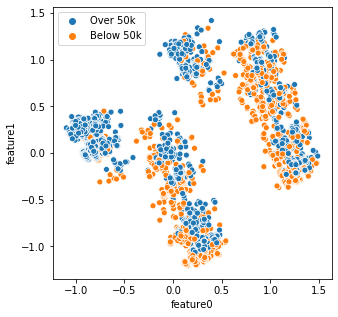

In [10]:
import matplotlib.pyplot as plt
y_pred = ['Below 50k' if x == 0 else 'Over 50k' for x in y_pred]
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sbn.scatterplot(x=pca_data["feature0"], y=pca_data["feature1"], hue=y_pred, ax=ax)
plt.show()

In [11]:
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
scores = cross_val_score(svm, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8317211730385383
Precision: 0.8231116162312259
Accuracy: 0.83 (+/- 0.01)


In [12]:
svm_metrics = metrics.classification_report(y_test, y_pred, target_names=target_names)

svm_metrics

'              precision    recall  f1-score   support\n\n   below 50k       0.87      0.92      0.89      4976\n   above 50k       0.68      0.55      0.61      1537\n\n    accuracy                           0.83      6513\n   macro avg       0.77      0.73      0.75      6513\nweighted avg       0.82      0.83      0.83      6513\n'

In [13]:
transformer = PCA(n_components=2).fit(X_test)
pca_data = transformer.transform(X_test)

pca_data = pd.DataFrame(
       pca_data,
       columns=['feature'+str(i) for i in range(pca_data.shape[1])]
    )

pca_data

,feature0,feature1
0,-0.789726,-0.045005
1,0.244021,-1.178310
2,0.152591,0.841635
3,0.315414,-1.029989
4,1.255817,-0.216773
...,...,...
6508,-0.969542,0.214485
6509,0.245616,-0.890142
6510,-0.819503,0.120471
6511,0.220569,-0.921900


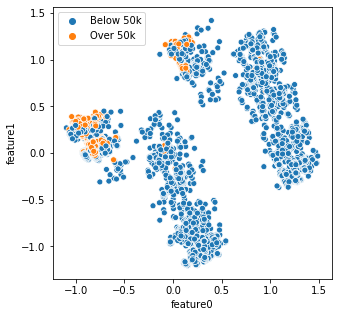

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y_pred = ['Below 50k' if x == 0 else 'Over 50k' for x in y_pred]
sbn.scatterplot(x=pca_data["feature0"], y=pca_data["feature1"], hue=y_pred, ax=ax)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8073084600030708
Precision: 0.8025298453974246
Accuracy: 0.81 (+/- 0.01)


In [16]:
knn_metrics = metrics.classification_report(y_test, y_pred, target_names=target_names)

knn_metrics

'              precision    recall  f1-score   support\n\n   below 50k       0.87      0.89      0.88      4976\n   above 50k       0.60      0.55      0.58      1537\n\n    accuracy                           0.81      6513\n   macro avg       0.73      0.72      0.73      6513\nweighted avg       0.80      0.81      0.80      6513\n'

In [17]:
transformer = PCA(n_components=2).fit(X_test)
pca_data = transformer.transform(X_test)

pca_data = pd.DataFrame(
       pca_data,
       columns=['feature'+str(i) for i in range(pca_data.shape[1])]
    )

pca_data

,feature0,feature1
0,-0.789726,-0.045005
1,0.244021,-1.178310
2,0.152591,0.841633
3,0.315414,-1.029986
4,1.255817,-0.216775
...,...,...
6508,-0.969542,0.214485
6509,0.245616,-0.890141
6510,-0.819503,0.120470
6511,0.220569,-0.921902


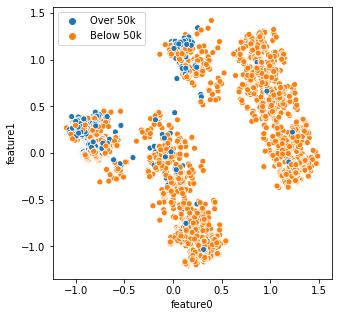

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y_pred = ['Below 50k' if x == 0 else 'Over 50k' for x in y_pred]
sbn.scatterplot(x=pca_data["feature0"], y=pca_data["feature1"], hue=y_pred, ax=ax)
plt.show()

In [19]:
print(naive_bayes_metrics)
print(svm_metrics)
print(knn_metrics)

              precision    recall  f1-score   support

   below 50k       0.97      0.40      0.56      4976
   above 50k       0.33      0.96      0.49      1537

    accuracy                           0.53      6513
   macro avg       0.65      0.68      0.53      6513
weighted avg       0.82      0.53      0.55      6513

              precision    recall  f1-score   support

   below 50k       0.87      0.92      0.89      4976
   above 50k       0.68      0.55      0.61      1537

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.83      6513

              precision    recall  f1-score   support

   below 50k       0.87      0.89      0.88      4976
   above 50k       0.60      0.55      0.58      1537

    accuracy                           0.81      6513
   macro avg       0.73      0.72      0.73      6513
weighted avg       0.80      0.81      0.80      6513



In [20]:
print(naive_bayes_accuracy)
print(svm_accuracy)
print(knn_accuracy)

0.5297098111469369
0.8317211730385383
0.8073084600030708


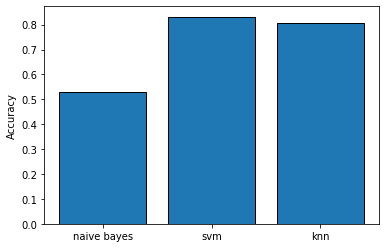

In [21]:
methods = ['naive bayes', 'svm', 'knn']
accuracies = [naive_bayes_accuracy, svm_accuracy, knn_accuracy]
plt.bar(methods, accuracies, edgecolor='black')
plt.ylabel('Accuracy')
plt.show()